<a href="https://colab.research.google.com/github/KutloanoMbonani/Data-Analysis-Portfolio/blob/main/EDA_Indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Extraction

First, we will import all the necessary modules.

In [67]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

Import the historical data of the Dow Jones Index (US30) and Nasdaq 100 Index. 

In [148]:
us = pd.DataFrame(yf.download('^DJI'))
nas = pd.DataFrame(yf.download('NDX'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [149]:
print("Length of us data:", len(us))
print("Length of nas data:", len(nas), '\n')
print("Top 5 rows of 'us' data")
us.head()

Length of us data: 7920
Length of nas data: 9500 

Top 5 rows of 'us' data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000


In [150]:
# Datasets have different lengths. Create a copy of 'nas' that has the number of rows as the 'us' dataset.
# us data begins at "1992-01-02" 
nas = nas.loc["1992-01-02": , ]
nas.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,330.855011,333.364990,322.559998,333.364990,333.364990,362760000
1992-01-03,333.364990,335.339996,331.390015,334.825012,334.825012,428400000
1992-01-06,334.825012,337.869995,334.220001,336.894989,336.894989,475440000
1992-01-07,336.894989,340.035004,333.390015,339.644989,339.644989,524500000
1992-01-08,339.644989,345.984985,336.595001,344.290009,344.290009,630260000


## Data Exploration
Let us plot the close prices of both datasets on the same set of axes to get a visual understanding.

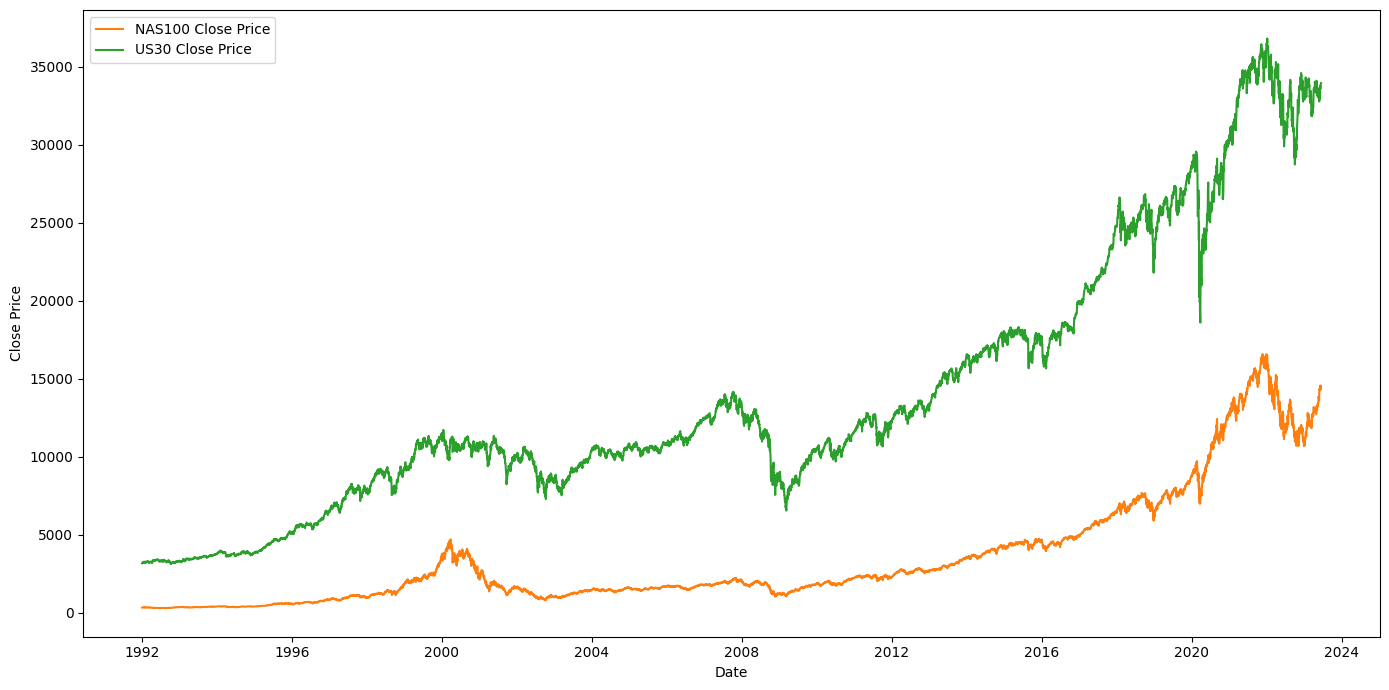

In [151]:
plt.figure(figsize = (14,7))
plt.plot(nas.index, nas['Close'], color = "C01", label = "NAS100 Close Price")
plt.plot(us.index, us['Close'], color = "C02", label = "US30 Close Price")
plt.xlabel('Date')
plt.ylabel("Close Price")
plt.legend()

- Both close prices are trending upward with minor retracements.
- US30 has larger dips in prices than NAS100.
- The dips seem to correlate with high impact global events, such as the Great Depression of 2008.
- US30 trades higher than NAS100.

## Data Transformation
We will perform a series of data transformation techniques to determine the following:

- which days have the highest volume?
- which days are the most volatile?
- on average, how many days does the market trend in one direction before reversing?
- what is the average return for each day of the week?
- what is the probability of a trend continuation given the previous day's trend? i.e P[ Up today | Up yesterday ]
- what are the probabilities of the day closing bearish and the day closing bullish?

Note, if price is bullish for the day, we will assign 1 to that day (row) or 0 otherwise.


In [152]:
# Get the days of the week into a column
nas['Date'] = nas.index
nas['Day of Week'] = nas['Date'].dt.day_name()

us['Date'] = us.index
us['Day of Week'] = us['Date'].dt.day_name()

# Classify days (rows) into 'Bullish or 'Bearish
nas['Candle'] = np.where(nas.Close > nas.Open, 'Bullish', 'Bearish')
us['Candle'] = np.where(us.Close > us.Open, 'Bullish', 'Bearish')


# Get volatility of each day
us['Volatility'] = np.abs(us['High'] - us['Low'])
nas['Volatility'] = np.abs(nas['High'] - nas['Low'])                  

In [153]:
nas_summary = nas.describe()
us_summary = us.describe()

In [154]:
us_summary

,Open,High,Low,Close,Adj Close,Volume,Volatility
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7.920000e+03,7920.000000
mean,13880.415605,13963.904744,13793.395568,13883.447826,13883.447826,1.907018e+08,170.509176
std,8396.533438,8439.969988,8349.233520,8396.708068,8396.708068,1.308957e+08,160.729858
min,3136.600098,3172.629883,3095.790039,3136.600098,3136.600098,8.410000e+06,6.479980
25%,8698.602539,8787.582764,8594.975098,8704.080322,8704.080322,7.891750e+07,75.281006
50%,10994.149902,11065.020020,10916.629883,10996.739746,10996.739746,1.881100e+08,126.419922
75%,17620.727051,17732.194336,17537.232422,17630.979492,17630.979492,2.740800e+08,206.552246
max,36722.601562,36952.648438,36636.000000,36799.648438,36799.648438,9.159900e+08,1904.390625


In [155]:
nas_summary

,Open,High,Low,Close,Adj Close,Volume,Volatility
count,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7.919000e+03,7919.000000
mean,3519.224094,3548.626463,3488.120768,3520.019970,3520.019970,1.891460e+09,60.505694
std,3705.348298,3733.906814,3674.268534,3706.147786,3706.147786,1.260003e+09,81.321016
min,290.029999,291.255005,287.635010,290.029999,290.029999,3.174000e+07,1.695007
25%,1223.334961,1242.559998,1206.424988,1225.215027,1225.215027,1.055835e+09,17.339966
50%,1933.060059,1951.489990,1916.380005,1933.060059,1933.060059,1.799070e+09,31.030029
75%,4379.155029,4417.764893,4355.454834,4388.084961,4388.084961,2.166880e+09,63.310303
max,16644.769531,16764.859375,16523.830078,16573.339844,16573.339844,1.162119e+10,923.659180


In [169]:
# Thresholds to consider a day as having high volatility
nas_thresh_vol = 450
us_thresh_vol = 900

# Dataframes with the days that have the highest volatility 
US_HighVol = pd.DataFrame()
NAS_HighVol = pd.DataFrame()

US_HighVol = us[us.Volatility > us_thresh_vol]
NAS_HighVol = nas[nas.Volatility > nas_thresh_vol]

# Drop all columns except the date, volatility, and day of week
NAS_HighVol = NAS_HighVol.drop(columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'Candle', 'Adj Close', 'Date'])
NAS_HighVol = NAS_HighVol.reset_index()
NAS_HighVol['Month'] = NAS_HighVol['Date'].dt.strftime('%b')

# Do the same for the US30 dataset
US_HighVol = US_HighVol.drop(columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'Candle', 'Adj Close', 'Date'])
US_HighVol = US_HighVol.reset_index()
US_HighVol['Month'] = US_HighVol['Date'].dt.strftime('%b')

US_HighVolMean = US_HighVol.groupby('Day of Week').mean().reset_index()
NAS_HighVolMean = NAS_HighVol.groupby('Day of Week').mean().reset_index()


<ipython-input-169-b7ebb25e17b9>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  US_HighVolMean = US_HighVol.groupby('Day of Week').mean().reset_index()
<ipython-input-169-b7ebb25e17b9>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NAS_HighVolMean = NAS_HighVol.groupby('Day of Week').mean().reset_index()


In [170]:
US_HighVolMean

,Day of Week,Volatility
0,Friday,1140.684353
1,Monday,1194.434837
2,Thursday,1156.843074
3,Tuesday,1135.268333
4,Wednesday,1132.960050


In [172]:
NAS_HighVolMean

,Day of Week,Volatility
0,Friday,572.623535
1,Monday,548.767090
2,Thursday,568.377755
3,Tuesday,538.709798
4,Wednesday,543.473999


In [174]:
# Create one merged dataframe with all these statistics
AverageVol = pd.DataFrame(columns = ['Day of Week', 'US30 Volatility Avg', 'NAS100 Volatility Avg'])
AverageVol['Day of Week'] = US_HighVolMean['Day of Week']
AverageVol['NAS100 Volatility Avg'] = NAS_HighVolMean['Volatility'] 
AverageVol['US30 Volatility Avg'] = US_HighVolMean['Volatility'] 
AverageVol

,Day of Week,US30 Volatility Avg,NAS100 Volatility Avg
0,Friday,1140.684353,572.623535
1,Monday,1194.434837,548.767090
2,Thursday,1156.843074,568.377755
3,Tuesday,1135.268333,538.709798
4,Wednesday,1132.960050,543.473999


If we take only the top 2 rows of each dataframe in order to determine the most volatile days to trade on, we see that, the best days to trade are: 
- Monday
- Thursday
- Friday

Now let us plot the data.

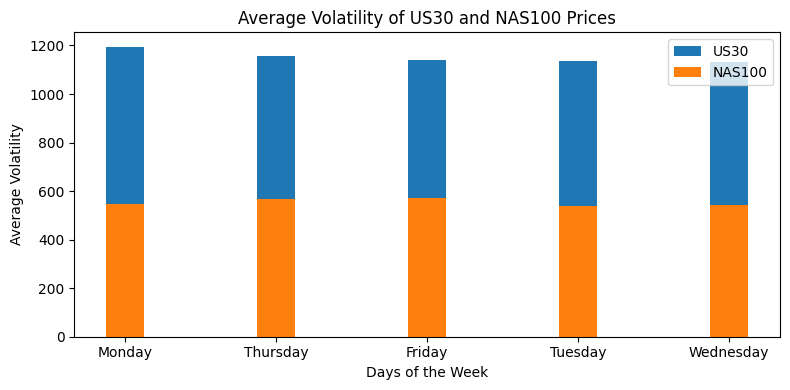

In [118]:
plt.figure(figsize = (8,4))
plt.bar(x = US_HighVolMean.index, height = US_HighVolMean['Volatility'], width = 0.25, label = 'US30')
plt.bar(x = NAS_HighVolMean.index, height = NAS_HighVolMean['Volatility'], width = 0.25, label = 'NAS100')
plt.title('Average Volatility of US30 and NAS100 Prices')
plt.xlabel('Days of the Week')
plt.ylabel('Average Volatility')
plt.legend()
plt.show()

Now to get the number of days that the market trends in one direction before reversing. Let's first consider a bullish trend. We will create a list that will contain all the counts of the bullish bars. Using a for loop, we will use an '==' condition to check if the current day and the next day are bullish. If they are, we increment the counter and the loop continues until it encounters a bearish day. After that, the counter must reset to 0 and the process starts all over again, until the end of the while loop

In [86]:
# To count the days in a trend 

nas_count_bullish = 0
nas_count_bearish = 0
nas_bullish_trend = []
nas_bearish_trend = []

nas1 = nas.drop('Date', axis = 1)
nas1 = nas1.reset_index()

for i in range(len(nas1) - 2):
  # If the current day is bullish and the next day is bullish
  if nas1.loc[i,'Candle'] == 'Bullish' and nas1.loc[i+1,'Candle'] == 'Bullish':
    nas_count_bullish = nas_count_bullish + 1
    
    # Check if the day after the next is bullish and count it
    if nas1.loc[i+1,'Candle'] == 'Bullish' and nas1.loc[i+2,'Candle'] == 'Bullish':
      nas_count_bullish = nas_count_bullish + 1

    # Otherwise add count to list, and reset it to 0
    else:
      nas_bullish_trend.append(nas_count_bullish)
      nas_count_bullish = 0 

  # Otherwise, if the current day is bearish and the next day is bearish
  else:
    if nas1.loc[i,'Candle'] == 'Bearish' and nas1.loc[i+1,'Candle'] == 'Bearish':
      nas_count_bearish = nas_count_bearish + 1

      # Check if the day after the next is bearish and count it
      if nas1.loc[i+1,'Candle'] == 'Bearish' and nas1.loc[i+2,'Candle'] == 'Bearish':
        nas_count_bearish = nas_count_bearish + 1

      # Otherwise, add count to list and reset to 0
      else:
        nas_bearish_trend.append(nas_count_bearish)
        nas_count_bearish = 0  

In [124]:
# To count the days in a trend 

us_count_bullish = 0
us_count_bearish = 0
us_bullish_trend = []
us_bearish_trend = []

us1 = us.drop('Date', axis = 1)
us1 = us1.reset_index()

for i in range(len(us1) - 2):
  # If the current day is bullish and the next day is bullish
  if us1.loc[i,'Candle'] == 'Bullish' and us1.loc[i+1,'Candle'] == 'Bullish':
    us_count_bullish = us_count_bullish + 1
    
    # Check if the day after the next is bullish and count it
    if us1.loc[i+1,'Candle'] == 'Bullish' and us1.loc[i+2,'Candle'] == 'Bullish':
      us_count_bullish = us_count_bullish + 1

    # Otherwise add count to list, and reset it to 0
    else:
      us_bullish_trend.append(us_count_bullish)
      us_count_bullish = 0 

  # Otherwise, if the current day is bearish and the next day is bearish
  else:
    if us1.loc[i,'Candle'] == 'Bearish' and us1.loc[i+1,'Candle'] == 'Bearish':
      us_count_bearish = us_count_bearish + 1

      # Check if the day after the next is bearish and count it
      if us1.loc[i+1,'Candle'] == 'Bearish' and us1.loc[i+2,'Candle'] == 'Bearish':
        us_count_bearish = us_count_bearish + 1

      # Otherwise, add count to list and reset to 0
      else:
        us_bearish_trend.append(us_count_bearish)
        us_count_bearish = 0 

In [125]:
NAS_BullTrend_DF = pd.DataFrame(pd.DataFrame(nas_bullish_trend, columns = ['Number of Days']).value_counts(), columns = ['Frequency']).reset_index()
NAS_BearTrend_DF = pd.DataFrame(pd.DataFrame(nas_bearish_trend, columns = ['Number of Days']).value_counts(), columns = ['Frequency']).reset_index()

US_BullTrend_DF = pd.DataFrame(pd.DataFrame(us_bullish_trend, columns = ['Number of Days']).value_counts(), columns = ['Frequency']).reset_index()
US_BearTrend_DF = pd.DataFrame(pd.DataFrame(us_bearish_trend, columns = ['Number of Days']).value_counts(), columns = ['Frequency']).reset_index()

In [127]:
NAS_BullMean = NAS_BullTrend_DF['Number of Days'].mean()
NAS_BearMean = NAS_BearTrend_DF['Number of Days'].mean()

US_BullMean = US_BullTrend_DF['Number of Days'].mean()
US_BearMean = US_BearTrend_DF['Number of Days'].mean()

# Create dataframe for average number of days trading in same direction
AverageDirection = pd.DataFrame(columns = ['Direction','NAS100 Average Days', 'US30 Average Days'])
AverageDirection['Direction'] = ['Bullish', 'Bearish']
AverageDirection['NAS100 Average Days'] = [NAS_BullMean, NAS_BearMean]
AverageDirection['US30 Average Days'] = [US_BullMean, US_BearMean]

AverageDirection

,Direction,NAS100 Average Days,US30 Average Days
0,Bullish,12.166667,10.0
1,Bearish,10.000000,9.0


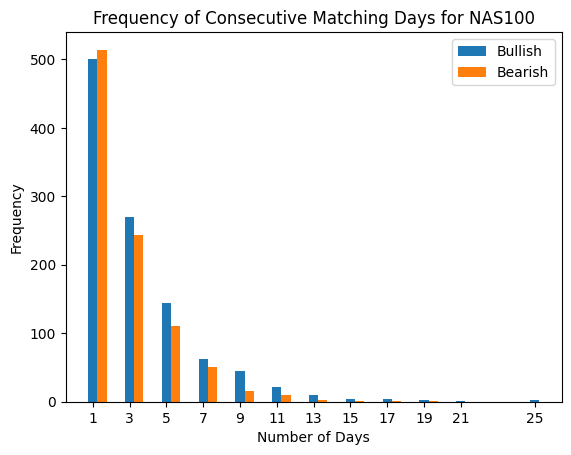

In [90]:
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title("Frequency of Consecutive Matching Days for NAS100")
plt.bar(x = NAS_BullTrend_DF['Number of Days'], height = NAS_BullTrend_DF['Frequency'], label = 'Bullish', width = 0.5)
plt.bar(x = NAS_BearTrend_DF['Number of Days'] + 0.5, height = NAS_BearTrend_DF['Frequency'], label = 'Bearish', width = 0.5)
plt.legend()
plt.xticks(NAS_BullTrend_DF['Number of Days'])
plt.show()

Observations:

- Daily direction continuation seems to be in favour of bullish direction rather than bearish direction.
- Seeing 3 consecutive days trending in the same direction has a decent occurence.
- From 13 days onwards, seeing the market trend in the same direction is an extreme event - a rare occurence.

### Working with requested probabilities

In [99]:
# Get counts for bullish and bearish days
us['Candle'].value_counts()

Bullish    4234
Bearish    3686
Name: Candle, dtype: int64

In [116]:
bull_count = 4234
bear_count = 3686

# Probabilities of getting bullish/bearish days
bull_prob = bull_count/(bull_count + bear_count)
bear_prob = bear_count/(bear_count + bull_count)


bull_bull_count = 0
bull_bear_count = 0
bear_bull_count = 0
bear_bear_count = 0

# Copy US30 dataframe and reset index
us1 = us.drop('Date', axis = 1)
us1 = us1.reset_index()

for n in range(1, len(us1)):

  # P(Bullish Today | Bullish Yesterday)
  if us1.loc[n, 'Candle'] == 'Bullish' and us1.loc[n-1, 'Candle'] == 'Bullish':
    bull_bull_count += 1

  # P(Bearish Today | Bearish Yesterday)
  if us1.loc[n, 'Candle'] == 'Bearish' and us1.loc[n-1, 'Candle'] == 'Bearish':
    bear_bear_count += 1

  # P(Bullish Today | Bearish Yesterday)
  if us1.loc[n, 'Candle'] == 'Bullish' and us1.loc[n-1, 'Candle'] == 'Bearish':
    bull_bear_count += 1

  # P(Bearish Today | Bullish Yesterday)
  if us1.loc[n, 'Candle'] == 'Bearish' and us1.loc[n-1, 'Candle'] == 'Bullish':
    bear_bull_count += 1

P_BullBull = bull_bull_count / bull_count
P_BearBear = bear_bear_count / bear_count
P_BullBear = bull_bear_count / bear_count
P_BearBull = bear_bull_count / bull_count

# Print these probabilities
print("We obtain the following conditional probabilities: ")
print()
print("P(Bullish Today | Bullish Yesterday) = ", P_BullBull)
print("P(Bearish Today | Bearish Yesterday) = ", P_BearBear)
print("P(Bullish Today | Bearish Yesterday) = ", P_BullBear)
print("P(Bearish Today | Bullish Yesterday) = ", P_BearBull)

We obtain the following conditional probabilities: 

P(Bullish Today | Bullish Yesterday) =  0.5214926783183751
P(Bearish Today | Bearish Yesterday) =  0.45062398263700487
P(Bullish Today | Bearish Yesterday) =  0.5493760173629951
P(Bearish Today | Bullish Yesterday) =  0.478271138403401


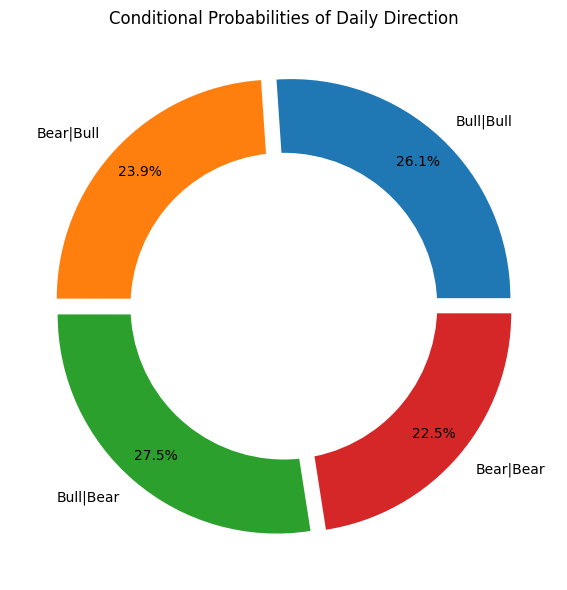

In [123]:
# Plot a donut chart

Probs = [P_BullBull, P_BearBull, P_BullBear, P_BearBear]
labels = ['Bull|Bull', 'Bear|Bull', 'Bull|Bear', 'Bear|Bear']
 
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
 
# Change figure size
plt.figure(figsize = (6,6))

# Pie Chart
plt.pie(Probs, labels = labels,
        autopct ='%1.1f%%', pctdistance=0.85,
        explode = explode)
sns.color_palette("rocket")
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Conditional Probabilities of Daily Direction')
 
# Displaying Chart
plt.show()

Observations: 
- It is to our advantage to buy US30 when the day begins and close when the day ends since the probability of the day closing bullish given either yesterday's bullish or bearish close is over 0.5
- These probabilities give us a slight edge over the markets

# Conclusion

**Which days are the most volatile?**
- Monday, Thursday and Friday 

**On average, how many days does the market trend in one direction before reversing?**
- US30 Bullish Average: 10 days
- US30 Bearish Average: 9 days
- NAS100 Bullish Average: 12 days
- NAS100 Bearish Average: 10 days

**What is the probability of a trend continuation given the previous day's trend? i.e P[ Up today | Up yesterday ]**
- P[Bull Today | Bull Yesterday] = 0.5215
- P[Bear Today | Bear Yesterday] = 0.4506
- P[Bull Today | Bear Yesterday] = 0.5494
- P[Bear Today | Bull Yesterday] = 0.4783

**What are the probabilities of the day closing bearish and the day closing bullish?**
- P[Bull] = 0.5346
- P[Bear] = 0.4654

**What is the average return for each day of the week?**
- See dataframe below

In [175]:
AverageVol

,Day of Week,US30 Volatility Avg,NAS100 Volatility Avg
0,Friday,1140.684353,572.623535
1,Monday,1194.434837,548.767090
2,Thursday,1156.843074,568.377755
3,Tuesday,1135.268333,538.709798
4,Wednesday,1132.960050,543.473999
